# AVIATION ACCIDENTS ANALYSIS

### Project Overview

For this project, you will use data cleaning, imputation, analysis, and visualization to generate insights for a business stakeholder.

### Business Problem
Your company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. You are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. You must then translate your findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.

### The Data
In the data folder is a datasetLinks to an external site. from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters.

It is up to you to decide what data to use, how to deal with missing values, how to aggregate the data, and how to visualize it in an interactive dashboard.

### Importing Libraries

In [7]:
#importing required libraries
import pandas as pd

### Loading Our Data

In [8]:
#loading the dataset
df=pd.read_csv('AviationData.csv',encoding='latin-1')


C:\Users\User\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### Exploring  And Understanding The Data
Performing an initial exploration of the dataset to understand its structure and contents.

In [9]:
# Display the first 10 rows of the dataset
df.head(10)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.4453,-70.7583,NaN,NaN,...,NaN,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause,06-11-2001
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,Business,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
9,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,NaN,NaN,JAX,JACKSONVILLE INTL,...,Personal,NaN,0.0,0.0,3.0,0.0,IMC,Cruise,Probable Cause,01-01-1982


In [11]:
#size of our Dataset
df.shape

(88889, 31)

In [15]:
#here we want to know the datatype of our dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [14]:
#summary statistics of our Dataset
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


### Data Cleaning

Handling any missing values,incorrect data entries and duplicates


In [17]:
#checking for duplicates
df.duplicated().sum()

0

In [18]:
df.duplicated().value_counts()

False    88889
dtype: int64

In [19]:
#Detecting NaNs
df.isna()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,True,...,False,True,False,True,True,True,False,False,False,False
3,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,True,True,True,False
88885,False,False,False,False,False,False,True,True,True,True,...,True,True,False,False,False,False,True,True,True,True
88886,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,True,False
88887,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,True,True,True,True


In [20]:
#checking for missing data
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

In [24]:
#For Continuous Data (Numerical Columns):

#We will fill missing values with the mean
continuous_columns = ['Latitude', 'Longitude', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 
                      'Total.Minor.Injuries', 'Total.Uninjured', 'Number.of.Engines']

continuous_columns = ['Latitude', 'Longitude', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 
                      'Total.Minor.Injuries', 'Total.Uninjured', 'Number.of.Engines'] 
for col in continuous_columns:
    # Convert the column to numeric
    df[col] = pd.to_numeric(df[col], errors='coerce')  
    df[col].fillna(df[col].mean(), inplace=True)

In [25]:
#for categorical data we fill the   missing values with the mode
# Categorical columns with missing data
categorical_columns = ['Investigation.Type', 'Accident.Number', 'Location', 'Country', 'Airport.Code', 
                       'Airport.Name', 'Injury.Severity', 'Aircraft.Category', 'Registration.Number', 
                       'Make', 'Model', 'Amateur.Built', 'Engine.Type', 'FAR.Description', 'Schedule', 
                       'Purpose.of.flight', 'Air.carrier', 'Weather.Condition', 'Broad.phase.of.flight', 
                       'Report.Status', 'Publication.Date']
# Filling missing categorical columns with mode 
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)


### Dropping unnecessary columns and rows


In [26]:
#dropping unnecessary columns
df.drop(columns=['Event.Id', 'Accident.Number'], inplace=True)

In [28]:
#dropping unnecessary rows
df.dropna(subset=['Injury.Severity'], inplace=True)

### Uniformity


In [31]:
#changing the column names to lower case
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,investigation.type,event.date,location,country,latitude,longitude,airport.code,airport.name,injury.severity,aircraft.damage,...,purpose.of.flight,air.carrier,total.fatal.injuries,total.serious.injuries,total.minor.injuries,total.uninjured,weather.condition,broad.phase.of.flight,report.status,publication.date
0,Accident,1948-10-24,"MOOSE CREEK, ID",United States,3994.505315,46456.376210,NONE,Private,Fatal(2),Destroyed,...,Personal,Pilot,2.0,0.000000,0.000000,0.00000,UNK,Cruise,Probable Cause,25-09-2020
1,Accident,1962-07-19,"BRIDGEPORT, CA",United States,3994.505315,46456.376210,NONE,Private,Fatal(4),Destroyed,...,Personal,Pilot,4.0,0.000000,0.000000,0.00000,UNK,Unknown,Probable Cause,19-09-1996
2,Accident,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NONE,Private,Fatal(3),Destroyed,...,Personal,Pilot,3.0,0.279881,0.357061,5.32544,IMC,Cruise,Probable Cause,26-02-2007
3,Accident,1977-06-19,"EUREKA, CA",United States,3994.505315,46456.376210,NONE,Private,Fatal(2),Destroyed,...,Personal,Pilot,2.0,0.000000,0.000000,0.00000,IMC,Cruise,Probable Cause,12-09-2000
4,Accident,1979-08-02,"Canton, OH",United States,3994.505315,46456.376210,NONE,Private,Fatal(1),Destroyed,...,Personal,Pilot,1.0,2.000000,0.357061,0.00000,VMC,Approach,Probable Cause,16-04-1980


### Renaming columns

In [33]:
# renaming 'event.date' to datetime
df['event.date'] = pd.to_datetime(df['event.date'], errors='coerce')



### Rechecking missing data

In [37]:
#checking if there is missing data
print(df.isnull().sum())

investigation.type           0
event.date                   0
location                     0
country                      0
latitude                     0
longitude                    0
airport.code                 0
airport.name                 0
injury.severity              0
aircraft.damage           3194
aircraft.category            0
registration.number          0
make                         0
model                        0
amateur.built                0
number.of.engines            0
engine.type                  0
far.description              0
schedule                     0
purpose.of.flight            0
air.carrier                  0
total.fatal.injuries         0
total.serious.injuries       0
total.minor.injuries         0
total.uninjured              0
weather.condition            0
broad.phase.of.flight        0
report.status                0
publication.date             0
dtype: int64


# PYTHON ANALYSIS

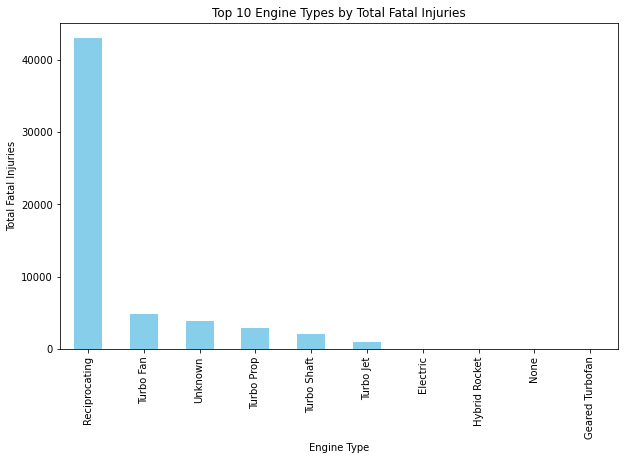

In [42]:
# Plot a barchart  of top 10 'Total Fatal Injuries'vs engine type
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
top_10_engine_types = df.groupby('engine.type')['total.fatal.injuries'].sum().nlargest(10)
top_10_engine_types.plot(kind='bar', color='skyblue')
plt.title('Top 10 Engine Types by Total Fatal Injuries')
plt.xlabel('Engine Type')
plt.ylabel('Total Fatal Injuries');


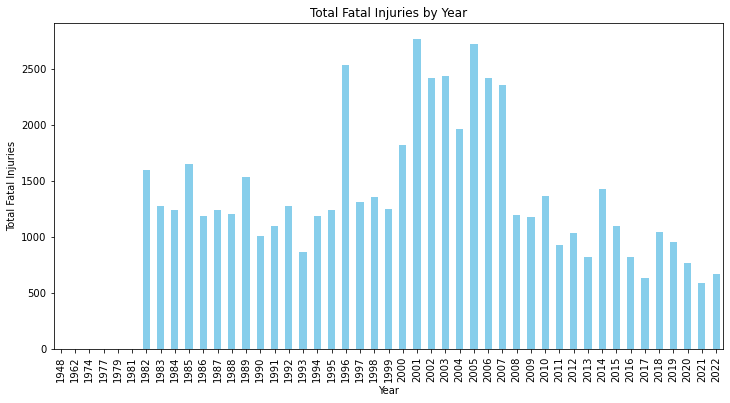

In [43]:
#visualization of  a bar chart for the event date and total fatal injuries
plt.figure(figsize=(12, 6))
df.groupby(df['event.date'].dt.year)['total.fatal.injuries'].sum().plot(kind='bar', color='skyblue')
plt.title('Total Fatal Injuries by Year')
plt.xlabel('Year')
plt.ylabel('Total Fatal Injuries');


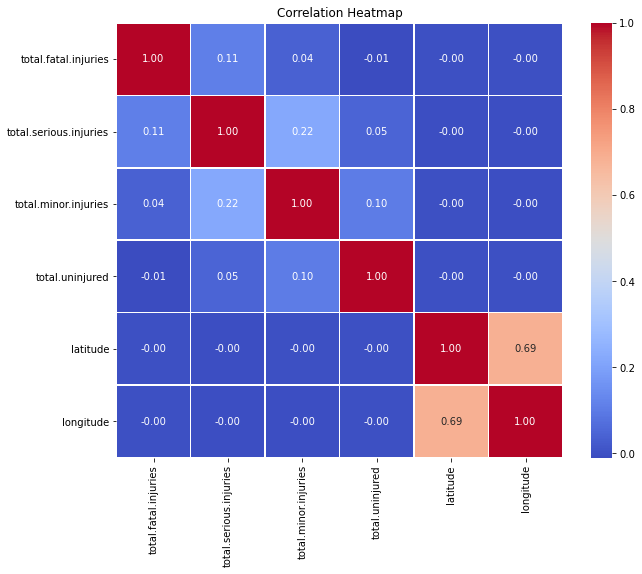

In [44]:
# correlation heatmap
import seaborn as sns
corr = df[['total.fatal.injuries', 'total.serious.injuries', 'total.minor.injuries', 'total.uninjured', 'latitude', 'longitude']].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

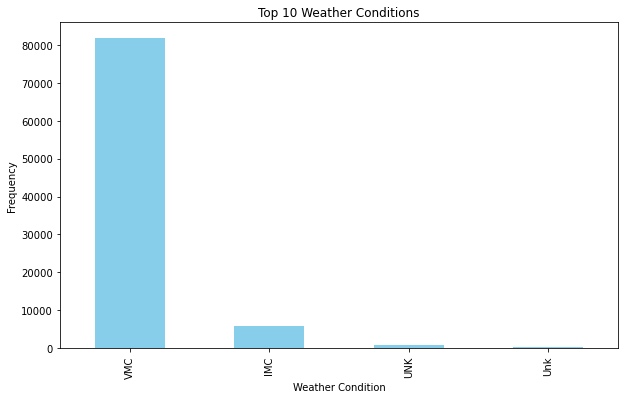

In [45]:
#weather condition vs total fatal injuries
plt.figure(figsize=(10, 6))
weather_counts = df['weather.condition'].value_counts().nlargest(10)
weather_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Frequency');

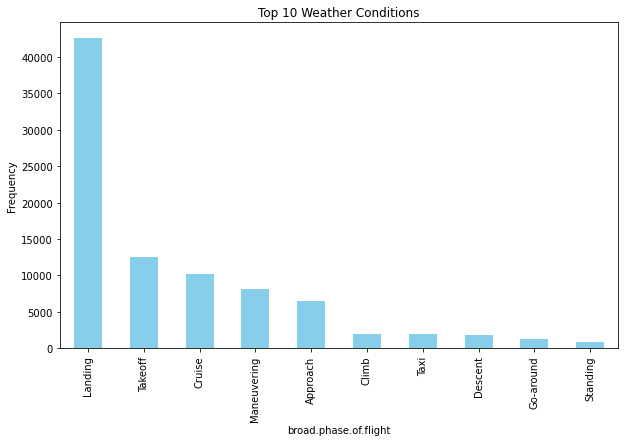

In [48]:
#broad phase of flight vs weather conditions
plt.figure(figsize=(10, 6))
weather_counts = df['broad.phase.of.flight'].value_counts().nlargest(10)
weather_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Weather Conditions')
plt.xlabel('broad.phase.of.flight')
plt.ylabel('Frequency');

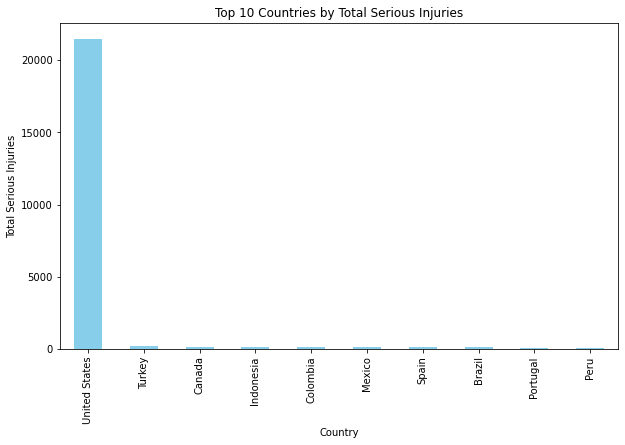

In [50]:
#bar chart for top 10 countries with total serious injuries
plt.figure(figsize=(10, 6))
top_10_countries = df.groupby('country')['total.serious.injuries'].sum().nlargest(10)
top_10_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries by Total Serious Injuries')
plt.xlabel('Country')
plt.ylabel('Total Serious Injuries');

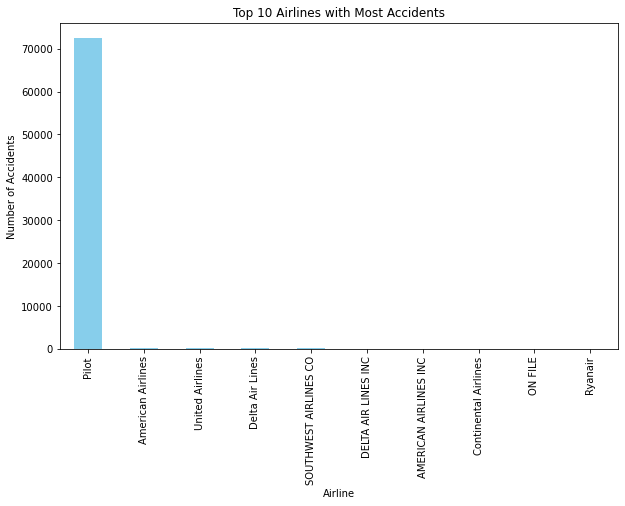

In [52]:
#visualization of  air carrier with most accidents
plt.figure(figsize=(10, 6))
top_10_airlines = df['air.carrier'].value_counts().nlargest(10)
top_10_airlines.plot(kind='bar', color='skyblue')
plt.title('Top 10 Airlines with Most Accidents')
plt.xlabel('Airline')
plt.ylabel('Number of Accidents');